In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import tensorflow as tf
keras = tf.keras

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM

In [2]:
paras_data = pd.read_csv('/kaggle/input/nse-defence-stocks-india/PARAS.NS.csv', index_col='Date')

In [3]:
paras_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-27,469.000000,492.450012,460.000000,492.450012,492.450012,2132033
2021-10-04,517.049988,628.400024,517.049988,628.400024,628.400024,955924
2021-10-11,659.799988,692.750000,575.450012,625.299988,625.299988,1780499
2021-10-18,643.900024,1198.300049,617.150024,1198.300049,1198.300049,15937012
2021-10-25,1245.000000,1258.199951,927.299988,927.299988,927.299988,2002537


<AxesSubplot:xlabel='Date'>

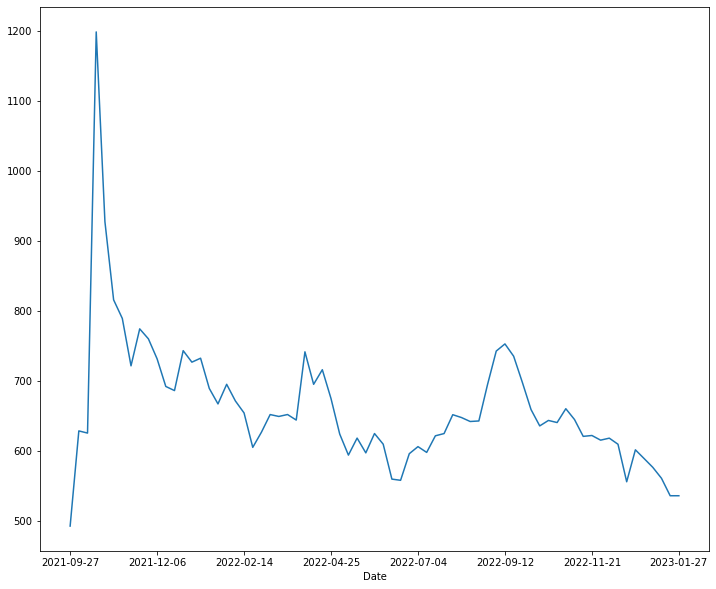

In [4]:
paras_data['Close'].plot(figsize=(12,10))

In [5]:
paras_data = paras_data.dropna()

In [6]:
scaled_paras_data = scaler.fit_transform(paras_data)

In [7]:
scaled_paras_data.shape

(71, 6)

In [8]:
look_back = 6

paras_data_generator = TimeseriesGenerator(scaled_paras_data, scaled_paras_data, length=look_back, batch_size=1)

In [9]:
paras_model = Sequential()

n_features = scaled_paras_data.shape[1]

paras_model.add(LSTM(128, activation='relu', return_sequences=True , input_shape=(look_back,n_features)))
paras_model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(look_back,n_features)))
paras_model.add(LSTM(512, activation='relu',  input_shape=(look_back,n_features)))

paras_model.add(Dense(n_features))

paras_model.compile(optimizer='adam', loss='mse')

2023-02-04 05:12:10.530292: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
paras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 128)            69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 256)            394240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               1574912   
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 2,041,350
Trainable params: 2,041,350
Non-trainable params: 0
_________________________________________________________________


In [11]:
paras_model.fit(paras_data_generator, epochs=500)

2023-02-04 05:12:37.108721: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
65/65 [==============================] - 5s 24ms/step - loss: 0.0139
Epoch 2/500
65/65 [==============================] - 2s 25ms/step - loss: 0.0069
Epoch 3/500
65/65 [==============================] - 2s 24ms/step - loss: 0.0063
Epoch 4/500
65/65 [==============================] - 2s 24ms/step - loss: 0.0060
Epoch 5/500
65/65 [==============================] - 2s 25ms/step - loss: 0.0057
Epoch 6/500
65/65 [==============================] - 2s 25ms/step - loss: 0.0057
Epoch 7/500
65/65 [==============================] - 2s 24ms/step - loss: 0.0066
Epoch 8/500
65/65 [==============================] - 2s 24ms/step - loss: 0.0064
Epoch 9/500
65/65 [==============================] - 2s 23ms/step - loss: 0.0065
Epoch 10/500
65/65 [==============================] - 2s 33ms/step - loss: 0.0060
Epoch 11/500
65/65 [==============================] - 2s 25ms/step - loss: 0.0048
Epoch 12/500
65/65 [==============================] - 2s 26ms/step - loss: 0.0046
Epoch 13/500
65/65 [=====

In [12]:
paras_model.save('/kaggle/working/paras_model.h5')

In [13]:
# for exporting important objects of model
import joblib

# create PKL files of important objects required for project
# these are required for prediction of future stock prices and also for the flask app
joblib.dump(scaler, "/kaggle/working/scaler.pkl")
joblib.dump(scaled_paras_data, "/kaggle/working/scaled_paras_data.pkl")
joblib.dump(look_back, "/kaggle/working/look_back.pkl")

['/kaggle/working/look_back.pkl']

<AxesSubplot:>

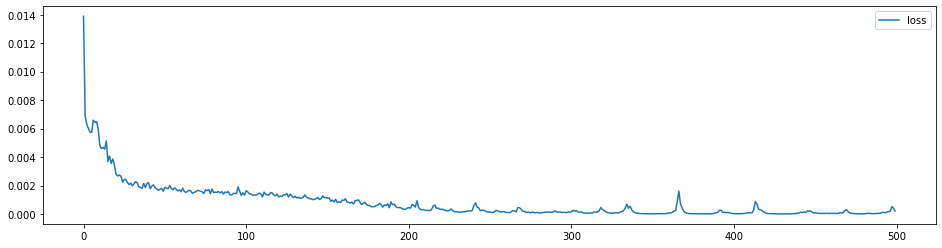

In [14]:
paras_loss = pd.DataFrame(paras_model.history.history)
paras_loss.plot(figsize=(16,4))